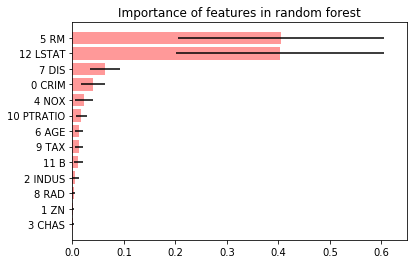

In [5]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

boston = load_boston()
X, y = boston.data, boston.target
feature_names = np.array(
    [
        " ".join([str(b), a])
        for a, b in zip(boston.feature_names, range(len(boston.feature_names)))
    ]
)
RF = RandomForestRegressor(n_estimators=100, random_state=101).fit(X, y)

feature_importances = [tree.feature_importances_ for tree in RF.estimators_]
importance = np.mean(feature_importances, axis=0)
std = np.std(feature_importances, axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("Importance of features in random forest")
plt.barh(
    range_, importance[indices], color="r", xerr=std[indices], alpha=0.4, align="center"
)
plt.yticks(range(len(importance)), feature_names[indices])
plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()

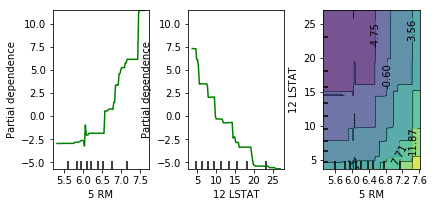

In [8]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

GBM = GradientBoostingRegressor(n_estimators=100, random_state=101).fit(X, y)
features = [5, 12, (5, 12)]
fig, axis = plot_partial_dependence(GBM, X, features, feature_names=feature_names)